# Adam Thomson - PHY573 - Quiz 2

## Code the circuits shown in Mermin's figure 6.5 (c) and (d)

In [81]:
# Import libraies
from IPython.display import Math
from qiskit import QuantumCircuit as QC
from qiskit.circuit.library import Initialize
from qiskit.quantum_info import random_statevector
from qiskit.result import marginal_counts
from qiskit.visualization import \
    array_to_latex, \
    plot_histogram, \
    plot_bloch_multivector

from qiskit_aer import AerSimulator
sampler = AerSimulator()

In [82]:
# Create a random 1-qubit state
psi = random_statevector(2)

# Create an instruction gate to set a qubit to this state
init_gate = Initialize(psi)
init_gate.label = "init"

# Display as equation and on Bloch Sphere
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(psi)

<IPython.core.display.Latex object>

QiskitError: 'Invalid DensityMatrix input: not a square matrix.'

### Code Figure C and simulate

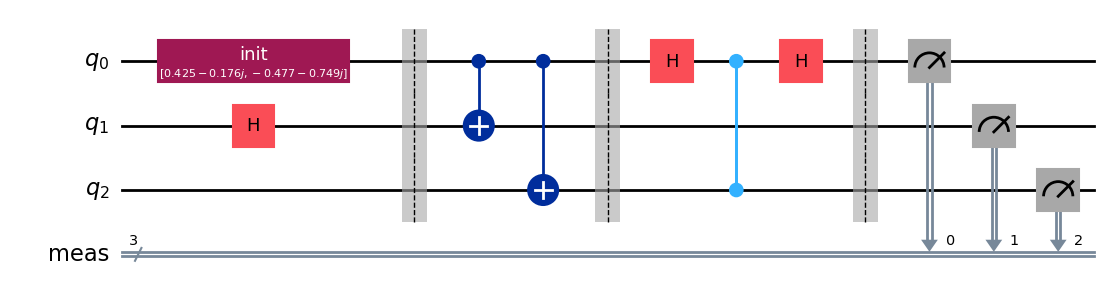

In [70]:
qc_c = QC(3)
# Start by setting up |psi> and |phi>
qc_c.append(init_gate, [0])
qc_c.h(1)

qc_c.barrier()

# Set up entanglement
qc_c.cx(0,1)
qc_c.cx(0,2)

qc_c.barrier()

# Execute the teleport
qc_c.h(0)
qc_c.cz(2,0)
qc_c.h(0)

# Measure results
qc_c.measure_all()
qc_c.draw(output="mpl", style="iqp")

#### Visualize results

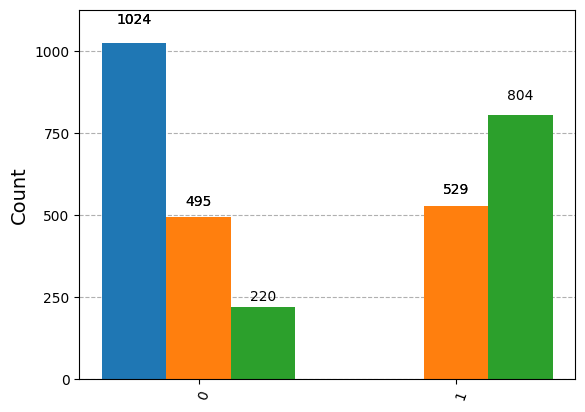

In [71]:
c_counts = sampler.run([qc_c]).result().get_counts()
qubit_counts = [marginal_counts(c_counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

### Code Figure D and simulate

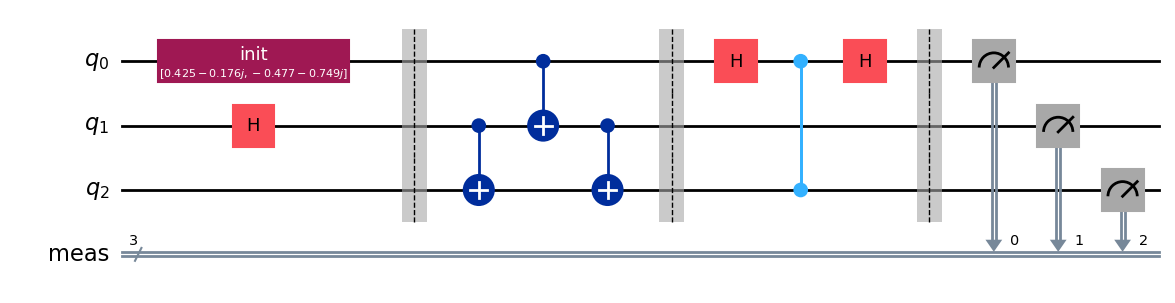

In [72]:
qc_d = QC(3)
# Start by setting up |psi> and |phi>
qc_d.append(init_gate, [0])
qc_d.h(1)

qc_d.barrier()

# Set up entanglement
qc_d.cx(1,2)
qc_d.cx(0,1)
qc_d.cx(1,2)

qc_d.barrier()

# Execute the teleport
qc_d.h(0)
qc_d.cz(0,2)
qc_d.h(0)

# Measure results
qc_d.measure_all()
qc_d.draw(output="mpl", style="iqp")

#### Visualize Results

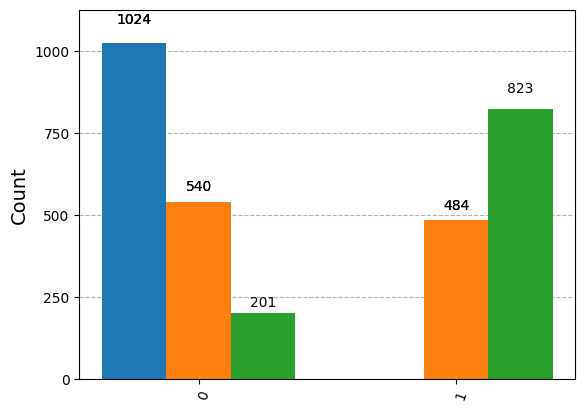

In [73]:
d_counts = sampler.run([qc_d]).result().get_counts()
qubit_counts = [marginal_counts(d_counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

### For any random |Ψ>, the plots are always the same!

## Exponential Growth

#### If we have an exponential code that for N=10 items takes 20 seconds to run; for N=20 it takes 20,480 seconds. How long will it take to run for N=30?

In [74]:
display(Math(r"K*2^{10} = 20"))
display(Math(r"K*2^{20} = 20,480"))
display(Math(r"K*2^{30} = ?"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [75]:
n10_sec = 20
n20_sec = 20480
n10_k = n10_sec / (2**10)
n20_k = n20_sec / (2**20)
display(Math(r"2^{10}= 1,024 => K = {n10_k}".replace("n10_k", str(n10_k))))
display(Math(r"2^{20} = 1,048,576 => K = {n20_k}".replace("n20_k", str(n20_k))))
display(Math(r"K = 0.01953125"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [76]:
k = 0.01953125
n30_sec = k * (2**30)
display(Math(r"K*2^{30} = {n30_sec} \; seconds".replace("n30_sec", f"{n30_sec:.0f}")))
n30_min = n30_sec / 60
display(Math(r"K*2^{30} \approx {n30_min} \; minutes".replace("n30_min", f"{n30_min:.0f}")))
n30_hr = n30_min / 60
display(Math(r"K*2^{30} \approx {n30_hr} \; hours".replace("n30_hr", f"{n30_hr:.00f}")))
n30_d = n30_hr / 24
display(Math(r"K*2^{30} \approx {n30_d} \; days!".replace("n30_d", f"{n30_d:.0f}")))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>